In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# load space
njobs = 200
contrasts_s = np.zeros(njobs)
spotsigs_s = np.zeros(njobs)
nl_ss = np.zeros(njobs)

with h5py.File('space/Gaussian_non-linear_N=1000_10.0nm/Gaussian_r=1_sig=1-100um.h5','r') as f:
    for njob in range(njobs):
        contrasts_s[njob]=f['{}/contrast'.format(njob)][0]
        others = f['{}/others'.format(njob)][:]
        spotsigs_s[njob]=others[0]
        nl_ss[njob]=others[2]


In [3]:
# load time
njobs = 500
contrasts_t = np.zeros(njobs)
tpulses_t = np.zeros(njobs)
nl_ts = np.zeros(njobs)

with h5py.File('time/Gaus/1000atom_Gaus_10.0nm.h5','r') as f:
    for njob in range(njobs):
        contrasts_t[njob] = f['{}/contrast'.format(njob)][0]
        nl_ts[njob] = f['{}/others'.format(njob)][1]
        tpulses_t[njob] = 1/nl_ts[njob] / (2*np.sqrt(np.pi))*2.36


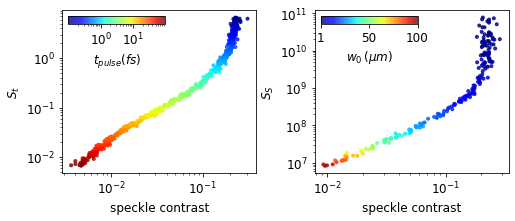

In [7]:
font = {'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 3])
im1 = ax1.scatter(contrasts_t, nl_ts, c=tpulses_t, cmap='jet', marker='.',norm=mpl.colors.LogNorm(vmin=0.1, vmax=100),alpha=0.8)
im2 = ax2.scatter(contrasts_s, nl_ss, c=spotsigs_s*1e6, cmap='jet', marker='.', vmin=1, vmax=100,alpha=0.8)

ax1.set_xscale('log'); ax1.set_yscale('log')
ax2.set_xscale('log'); ax2.set_yscale('log')
ax1.set_xlabel('speckle contrast'); ax1.set_ylabel(r'$S_t$')
ax2.set_xlabel('speckle contrast'); ax2.set_ylabel(r'$S_S$')

plt.subplots_adjust( wspace=0.3 )

cax1 = inset_axes(ax1, width="50%", height="5%", loc='upper left')
cax2 = inset_axes(ax2, width="50%", height="5%", loc='upper left')

cbar1 = plt.colorbar(im1, cax=cax1, orientation="horizontal", ticks=[1, 10])
cbar2 = plt.colorbar(im2, cax=cax2, orientation='horizontal', ticks=[1, 50, 100])

cax1.set_xlabel(r'$t_{pulse} (fs)$')
cax2.set_xlabel(r'$w_0\,(\mu m)$')

plt.savefig('Nonlinearity.svg', transparent=True)
